# General setup

In [1]:
# General setup
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
from langouEEG import *
from scipy.stats import *
from eeg_microstates3 import *
import pandas as pd
import time
import mne
import pickle
from mne.datasets import sample
from mne.datasets import fetch_fsaverage
from mpl_toolkits.mplot3d import Axes3D  # noqa
from langouMicrostates import *
from IPython.display import clear_output as clear
import logging
# import easyEEG

sample_data_folder = mne.datasets.sample.data_path()
# dataRoot = "/data/home/viscent/Light"
dataRoot = "/work/zhangyq/Light/"


# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
isMale = False
isAll = True
isBlind = False
if not isAll:
    result_dir = op.join(dataRoot,'result','male' if isMale else 'female')
else:
    result_dir = op.join(dataRoot,'result','all')
subjects_dir = op.dirname(fs_dir)
if not op.exists(result_dir):
    os.mkdir(result_dir)
# The files live in:


0 files missing from root.txt in /work/zhangyq/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /work/zhangyq/mne_data/MNE-fsaverage-data/fsaverage


# Read the data

In [2]:
%%capture
## Input EEG data and extarct epochs

epochs_4F = dict()
epochs_RF = dict()
epochs_4R = dict()
epochs_RR = dict()
#epochs_all = dict()


# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 60, 15, 30
# tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 50, 15, 22
tmin_rest, tmax_rest, tmin_flick,tmax_flick = 5, 25, 5, 25
# tmin_R_flick, tmax_R_flick = 20, 25
# tmin_R_flick, tmax_R_flick = 20, 22
tmin_R_flick, tmax_R_flick = 5, 25

# Total 1-21
# 1-11 and 12-21
epoch_num = 0
for subject_name in range(1,21):
    if not isAll:
        if not (isMale ^ (subject_name in [7,8,11,17])):
            continue
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_forall(raw,events,picks, 
    tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_flick,tmax_flick = tmax_flick)
    # 为啥搞两遍？
    ## A: 因为之前random与40Hz取的时间段不同，我写的垃圾代码只能传进一个tmin_flick
    _,epoch_RF,_,_ = extractEpochs_forall(raw,events,picks, 
    tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_R_flick,tmax_flick = tmax_R_flick)
    epochs_4F[subject_name]=epoch_4F
    epochs_RF[subject_name]=epoch_RF
    epochs_RR[subject_name]=epoch_RR
    epochs_4R[subject_name]=epoch_4R
    #epochs_all[epoch_num] = epoch_4R
    #epochs_all[epoch_num+1] = epoch_4F
    #epochs_all[epoch_num+2] = epoch_RF
 
    data_path = sample.data_path()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')

    epoch_num += 3
    # Clear output display
    clear()

## Concact epochs
epoch_4F = mne.concatenate_epochs(list(epochs_4F.values()))
epoch_RF = mne.concatenate_epochs(list(epochs_RF.values()))
epoch_4R = mne.concatenate_epochs(list(epochs_4R.values()))
# epoch_all = mne.concatenate_epochs(list(epochs_all.values()))
# mne.epochs.equalize_epoch_counts([epoch_4F, epoch_RF, epoch_RR])

# Clear output display
clear()

# Concatenate all epochs in all conditions

In [3]:
epoch_all = mne.concatenate_epochs([epoch_4F, epoch_RF, epoch_4R])
epoch_dur = np.zeros((3))
epoch_dur = [epoch_4F.get_data().shape[0]*epoch_4F.get_data().shape[2],epoch_RF.get_data().shape[0]*epoch_RF.get_data().shape[2],epoch_4R.get_data().shape[0]*epoch_4R.get_data().shape[2]]
epoch_count = [epoch_4F.get_data().shape[0],epoch_RF.get_data().shape[0],epoch_4R.get_data().shape[0]]
epoch_size = epoch_all.get_data().shape[2]

Not setting metadata
Not setting metadata
302 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped


# Do MS analysis

(3020302, 64)


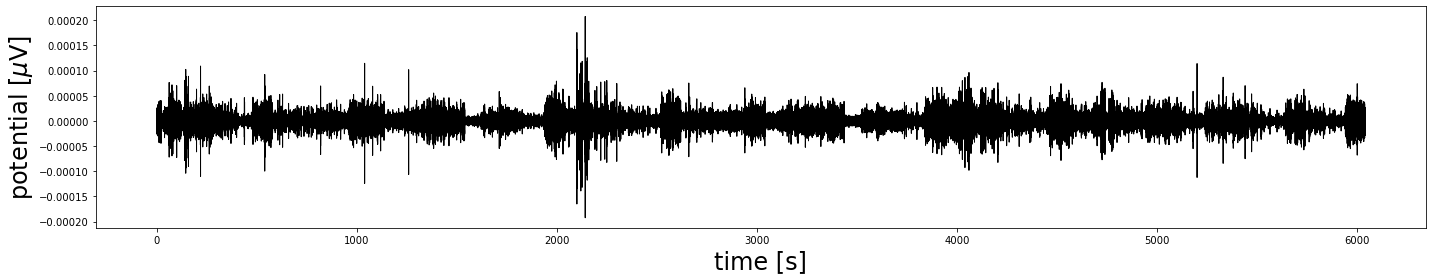

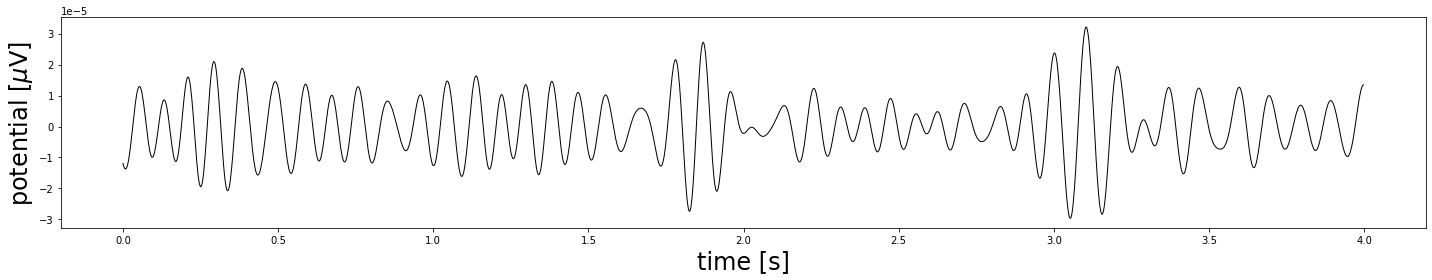

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 126860 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 52 iterations.
	K-means run 2/5 converged after 45 iterations.
	K-means run 3/5 converged after 96 iterations.
	K-means run 4/5 converged after 40 iterations.
	K-means run 5/5 converged after 42 iterations.
[+] Computation time: 65.97 sec

[+] Microstate back-fitting:
data_norm:  (3020302, 64)
data_cluster_norm:  (126860, 64)
maps:  (8, 64)

[+] Global explained variance GEV = 0.633
GEV_0: 0.112
GEV_1: 0.094
GEV_2: 0.065
GEV_3: 0.071
GEV_4: 0.088
GEV_5: 0.069
GEV_6: 0.032
GEV_7: 0.103

Empirical symbol distribution (RTT):

p_0 = 0.008
p_1 = 0.107
p_2 = 0.003
p_3 = 0.203
p_4 = 0.149
p_5 = 0.211
p_6 = 0.135
p_7 = 0.182

Empirical transition matrix:

|0.7600.0410.0080.0390.0330.0440.0390.036|
|0.0040.8750.0010.0270.0230.0280.0230.018|
|0.0220.0330.8180.0260.0190.0280.0250.030|
|0.0020.0140.0000.8690.0250.0460.0230.021|
|0.

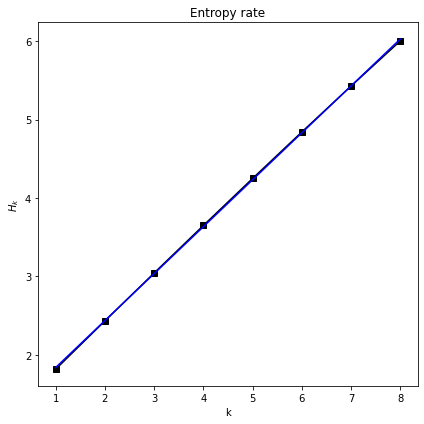


Empirical entropy rate h = 0.60
Theoretical MC entropy rate h = 0.62


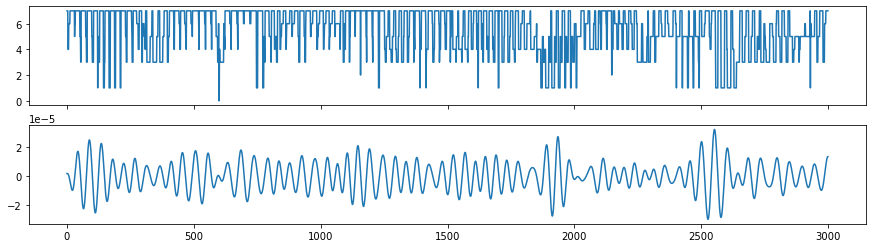

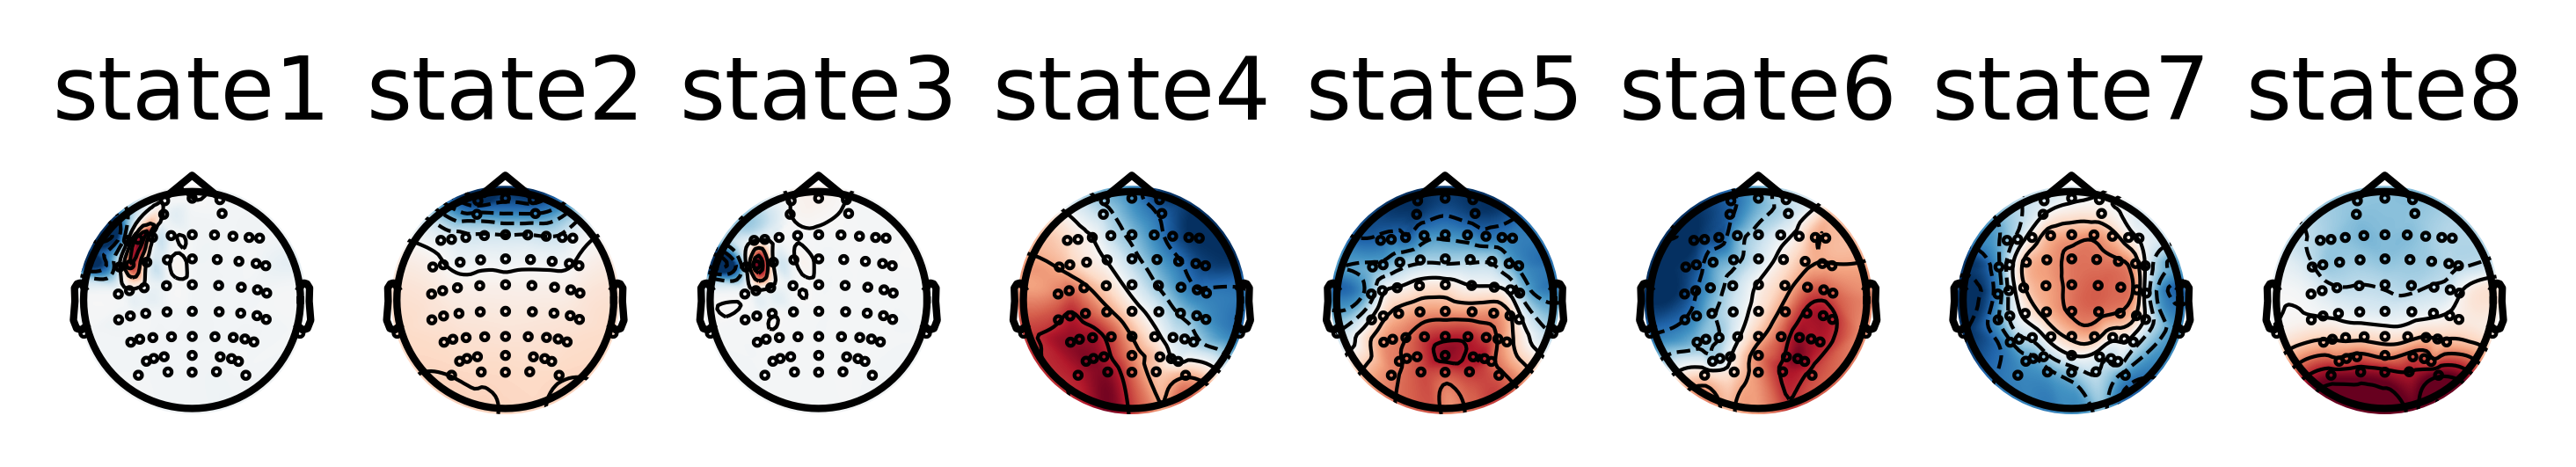

In [4]:
# epochs_order = list(epochs_4R.values())
# for i in list(epochs_4F.values()):
#     epochs_order.append(i)
# for i in list(epochs_RF.values()):
#     epochs_order.append(i)
# epoch_order = mne.concatenate_epochs(epochs_order)
epoch_order = epoch_all

dataRoot = "/work/zhangyq/Light/"

result_dir = dataRoot + "result/microstates"
tm = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
time_augs=[['min_rest','max_rest','min_flick','max_flick','min_random_flick','max_random_flick']
,[tmin_rest, tmax_rest, tmin_flick, tmax_flick, tmin_R_flick, tmax_R_flick]]

# Args to save MS result
save = False
to_save_cache = False
save_log = False

from langouEEG import *
vars_all = display_maps(epoch_order, n_maps=8, save=save, dpi=600, filename='all',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=False, epochs=epoch_order,save_log=save_log, f_lo=8, f_hi=13)

# Wash the data, seperate the data according to different conditions

In [5]:
# return maps, x, gfp_peaks, gev, data,pca1
x = vars_all[1]
gfp = vars_all[2]
gfp_l = np.zeros(x.shape[0])
gfp_l[gfp] = 1
u = v = 0
i_prev = x[0]
for i in x:
    if i != i_prev:
        if v-u < 15:
            for j in range(u, v):
                x[j] = 8
        v+=1
        u=v
    else:
        v+=1
x_4F = vars_all[1][0:epoch_dur[0]]
x_RF = vars_all[1][epoch_dur[0]:epoch_dur[0]+epoch_dur[1]]
x_4R = vars_all[1][epoch_dur[0]+epoch_dur[1]:epoch_dur[0]+epoch_dur[1]+epoch_dur[2]]

In [6]:
reject_rate = np.sum(np.where(x==8,1,0))/x.shape[0]
print(str(reject_rate)+' data rejected for too short duration ( < 30ms)')

x_clean_4F = np.zeros(x_4F.shape[0]-(np.sum(np.where(x_4F==8,1,0))),dtype=np.int16)
gfp_4F = np.zeros(x_4F.shape[0]-(np.sum(np.where(x_4F==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_4F.shape[0]):
    if x_4F[j] != 8:
        x_clean_4F[i] = x_4F[j]
        gfp_4F[i] = gfp_l[j]
        i+=1
        
x_clean_RF = np.zeros(x_RF.shape[0]-(np.sum(np.where(x_RF==8,1,0))),dtype=np.int16)
gfp_RF = np.zeros(x_RF.shape[0]-(np.sum(np.where(x_RF==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_RF.shape[0]):
    if x_RF[j] != 8:
        x_clean_RF[i] = x_RF[j]
        gfp_RF[i] = gfp_l[j]
        i+=1
        
x_clean_4R = np.zeros(x_4R.shape[0]-(np.sum(np.where(x_4R==8,1,0))),dtype=np.int16)
gfp_4R = np.zeros(x_4R.shape[0]-(np.sum(np.where(x_4R==8,1,0))),dtype=np.int16)
i = 0
for j in range(x_4R.shape[0]):
    if x_4R[j] != 8:
        x_clean_4R[i] = x_4R[j]
        gfp_4R[i] = gfp_l[j]
        i+=1
    

0.12018930557275398 data rejected for too short duration ( < 30ms)


# Quantitative analysis
## Coverage

In [7]:
epoch_minimum = np.min(epoch_count)
coverage = np.zeros((3,epoch_minimum,8))
for i in range(epoch_minimum):
    coverage[0,i] = np.bincount(x_clean_4F[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size
    coverage[1,i] = np.bincount(x_clean_RF[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size
    coverage[2,i] = np.bincount(x_clean_4R[i*epoch_size:(i+1)*epoch_size],minlength=8)/epoch_size

In [8]:
'''pval matrix
4F-4R 0-7
RF-4R 8-15
4F-RF 16-23
'''
from statsmodels.stats.multitest import *
from scipy.stats import ttest_ind
pval = np.zeros(24)
for j in range(8):
    pval[j] = ttest_ind(coverage[0,:,j],coverage[2,:,j])[1]
    pval[8+j] = ttest_ind(coverage[1,:,j],coverage[2,:,j])[1]
    pval[16+j] = ttest_ind(coverage[0,:,j],coverage[1,:,j])[1]
fdr_val = fdrcorrection(pval,alpha=0.05,method='indep',is_sorted=False)
fdr_4F_4R = [fdr_val[0][0:8],fdr_val[1][0:8]]
fdr_RF_4R = [fdr_val[0][8:16],fdr_val[1][8:16]]
fdr_4F_RF = [fdr_val[0][16:24],fdr_val[1][16:24]]

fdr_val


(array([False, False, False, False, False, False, False, False, False,
         True, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False]),
 array([0.83636801, 0.18630076, 0.82393825, 0.83636801, 0.83636801,
        0.83636801, 0.89199862, 0.96876669, 0.43342371, 0.00811572,
        0.43342371, 0.35792245, 0.83636801, 0.04642867, 0.83636801,
        0.83636801, 0.50958474, 0.41719959, 0.41588609, 0.43342371,
        0.6407072 , 0.10915629, 0.83636801, 0.83636801]))

## Frequency of occurance

In [9]:
freq_occur_4F = []
for i in range(epoch_minimum):
    idx = np.where(gfp_4F[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_4F[idx],minlength=8)/np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_4F.append(freq_occur)
freq_occur_4F = np.array(freq_occur_4F)
freq_occur_RF = []
for i in range(epoch_minimum):
    idx = np.where(gfp_RF[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_RF[idx],minlength=8)/np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_RF.append(freq_occur)
freq_occur_RF = np.array(freq_occur_RF)
freq_occur_4R = []
for i in range(epoch_minimum):
    idx = np.where(gfp_4R[i*epoch_size:(i+1)*epoch_size]==1)
    freq_occur = np.bincount(x_clean_4R[idx],minlength=8)/np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size])
    if np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size]) != 0:
        freq_occur_4R.append(freq_occur)
freq_occur_4R = np.array(freq_occur_4R)

<ipython-input-9-87ead1ec2557>:4: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_4F[idx],minlength=8)/np.sum(gfp_4F[i*epoch_size:(i+1)*epoch_size])
<ipython-input-9-87ead1ec2557>:11: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_RF[idx],minlength=8)/np.sum(gfp_RF[i*epoch_size:(i+1)*epoch_size])
<ipython-input-9-87ead1ec2557>:18: RuntimeWarning: invalid value encountered in true_divide
  freq_occur = np.bincount(x_clean_4R[idx],minlength=8)/np.sum(gfp_4R[i*epoch_size:(i+1)*epoch_size])


In [10]:
freq_occur_4F[1,:]

array([0.00255102, 0.10459184, 0.        , 0.18112245, 0.11479592,
       0.25510204, 0.11479592, 0.22704082])

## Duration

In [11]:
dur_4F = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_4F[0]
    for j in x_clean_4F[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_4F[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1
dur_RF = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_RF[0]
    for j in x_clean_RF[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_RF[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1
dur_4R = [[],[],[],[],[],[],[],[]]
for i in range(epoch_minimum):
    u = v = 0
    prev_state = x_clean_4R[0]
    for j in x_clean_4R[i*epoch_size:(i+1)*epoch_size]:
        if j != prev_state:
            dur_4R[prev_state].append(u-v)
            u = v
            prev_state = j
        v += 1


# MS class selection
## According to the highest *n* occurance 

In [12]:
def pick_MS(x, accept_list=[]):
    state_prev = -1
    # 避免前几个不再accept_list之内
    for i in x:
        if i in accept_list:
            state_prev = i
            break
    # 从头遍历，将x中不在accept_list当中的state替换为前面的一个state
    for index, i in enumerate(x):
        if i not in accept_list:
            x[index] = state_prev
        else:
            state_prev = x[index]
    return x


# Quantitative analysis continue
## Transition matrix

In [13]:

# vars return: maps, x, gfp_peaks, gev, data, pca1
def analyze_RTT(x, n_maps):
    p_hat = p_empirical(x, n_maps)
    T_hat = T_empirical(x, n_maps)
    print("\nEmpirical symbol distribution (RTT):\n")
    for i in range(n_maps):
        print(f"p_{i:d} = {p_hat[i]:.3f}")
    print("\nEmpirical transition matrix:\n")
    print_matrix(T_hat)
    return

accept_list=[0, 2, 4, 6]
x_pick_4R = pick_MS(x=x_clean_4R, accept_list=accept_list)
x_pick_4F = pick_MS(x=x_clean_4F, accept_list=accept_list)
x_pick_RF = pick_MS(x=x_clean_RF, accept_list=accept_list)



In [14]:
analyze_RTT(x_pick_4R, n_maps=8)
analyze_RTT(x_pick_4F, n_maps=8)
analyze_RTT(x_pick_RF, n_maps=8)



Empirical symbol distribution (RTT):

p_0 = 0.037
p_1 = 0.000
p_2 = 0.010
p_3 = 0.000
p_4 = 0.494
p_5 = 0.000
p_6 = 0.459
p_7 = 0.000

Empirical transition matrix:

|0.9520.0000.0020.0000.0240.0000.0230.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0080.0000.9470.0000.0240.0000.0200.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0020.0000.0000.0000.9750.0000.0230.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0020.0000.0010.0000.0250.0000.9730.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|

Empirical symbol distribution (RTT):

p_0 = 0.037
p_1 = 0.000
p_2 = 0.008
p_3 = 0.000
p_4 = 0.504
p_5 = 0.000
p_6 = 0.451
p_7 = 0.000

Empirical transition matrix:

|0.9500.0000.0020.0000.0240.0000.0240.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0070.0000.9420.0000.0270.0000.0240.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0020.0000.0000.0000.9730.0000.0240.000|
|0.0000.0000.0000.0000.0000.0000.0000.000|
|0.0020.0000.0000.0000.0270.0000.9700.000|
|0.0000.0000.0000.0000.